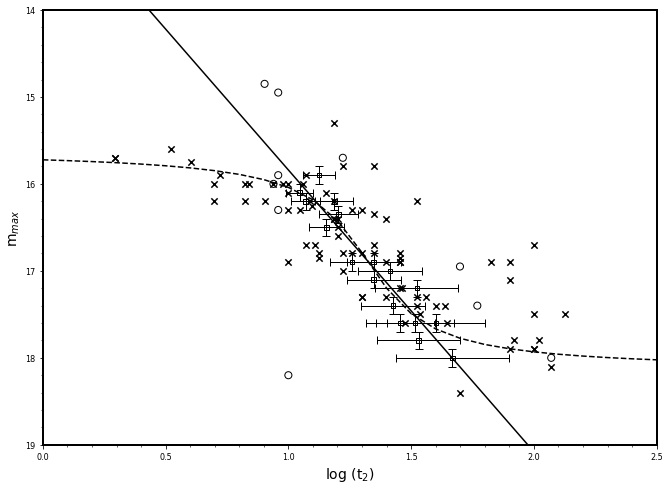

In [220]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import openpyxl as xl

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

%matplotlib inline

#  files in D:\Dropbox\Public Documents\Astronomy\UCLAN\AA1055 IT for Astronomy\Assignment 1\PythonGraphData.xlsx
# sheet names  LineFittingNovas    NonLineFittingNovas  LowQuality

from openpyxl import load_workbook

# Load in the workbook
path = "d:\\Dropbox\\Public Documents\\Astronomy\\UCLAN\\AA1055 IT for Astronomy\\Assignment 1\\PythonGraphData.xlsx"
wb_obj = xl.load_workbook(path)

# Get the Line Fitting Novas , put in DF1
ws1 = wb_obj['LineFittingNovas']
data = ws1.values
# Get the first line in file as a header line
columns = next(data)[0:]
# Create a DataFrame based on the second and subsequent lines of data
df1 = pd.DataFrame(data, columns=columns)

# Get the Non Line Fitting Novas, put in DF2
ws2 = wb_obj['NonLineFittingNovas']
data = ws2.values
# Get the first line in file as a header line
columns = next(data)[0:]
# Create a DataFrame based on the second and subsequent lines of data
df2 = pd.DataFrame(data, columns=columns)

# Get the Low Quality Novas, put in DF3
ws3 = wb_obj['LowQuality']
data = ws3.values
# Get the first line in file as a header line
columns = next(data)[0:]
# Create a DataFrame based on the second and subsequent lines of data
df3 = pd.DataFrame(data, columns=columns)

# Get the Non Linear Curve, put in DF4
ws4 = wb_obj['NonLin']
data = ws4.values
# Get the first line in file as a header line
columns = next(data)[0:]
# Create a DataFrame based on the second and subsequent lines of data
df4 = pd.DataFrame(data, columns=columns)
###############

#set up linear best fit
#equation derived in excel.
def linline(x):
    return 12.6+x*3.24

y1=df1['mmax']
x1=df1['log t2']

y2=df2['mmax']
x2=df2['log t2']

y3=df3['mmax']
x3=df3['log t2']

y4=df4['mmax']
x4=df4['log t2']

x5=np.array([0.0, 2.5])
y5=linline(x5)

yerror=df1['ErrorY']
xerror= df1['Dlog t2']

scatter=plt.scatter(x1,y1,marker='s', s=20.0, facecolors="None" , edgecolors='k')
plt.scatter(x2,y2,marker='o', s=50.0, facecolors="None" , edgecolors='k')
plt.scatter(x3,y3, marker='x',color='k', s=40.0)

plt.plot(x4,y4, color='k',linestyle= 'dashed')
plt.plot(x5,y5, color='k',linestyle= 'solid')

#add error bars
plt.errorbar(x,y,xerr=xerror,yerr=yerror,linestyle="None", elinewidth=1, capsize=4,color='k')

#now fix inverted scale on y axis
ax=scatter.axes
ax.set_ylim(19,14)
ax.set_xlim(0.,2.5)

# fix small tick labels & graph size
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
fig = plt.gcf()
fig.set_size_inches(11,8)

ax.set_xlabel("log (t$_2$)",fontsize=14)
ax.set_ylabel("m$_{max}$",fontsize=14)

ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

fig.savefig("Astro.pdf");

In [78]:
df1

,mmax,log t2,Dlog t2,ErrorY
0,15.90,1.124939,0.067,0.1
1,16.10,1.045757,0.056,0.1
2,17.00,1.414539,0.130,0.1
3,17.60,1.455932,0.140,0.1
4,17.20,1.522879,0.170,0.1
5,17.40,1.425969,0.130,0.1
6,17.80,1.530178,0.170,0.1
7,17.60,1.515700,0.160,0.1
8,18.00,1.667562,0.230,0.1
9,16.50,1.154902,0.071,0.1


In [130]:
df2

,mmax,log t2
0,18.20,1.000000
1,16.00,0.939302
2,18.00,2.070581
3,14.85,0.903090
4,16.30,0.958607
5,16.95,1.698970
6,14.95,0.958607
7,15.90,0.958607
8,17.40,1.769551
9,15.70,1.221849


In [135]:
y2

0    18.20
1    16.00
2    18.00
3    14.85
4    16.30
5    16.95
6    14.95
7    15.90
8    17.40
9    15.70
Name: mmax, dtype: float64

In [144]:
y3

0     16.7
1     15.8
2     15.8
3     17.1
4     16.2
      ... 
73    16.0
74    17.9
75    16.9
76    17.4
77    16.8
Name: mmax, Length: 78, dtype: float64